In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.constants import c, k_B, M_sun, G, m_p, sigma_sb, m_p
import astropy.units as u
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix
from scipy.integrate import LSODA
import numpy as np
import numba
import sys

sys.path.append('../Numerical_methods')
from bachelor_funcs import Σ_initial

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

In [3]:
N = 1000
r_in = 0.01 # AU
r_out = 1e4 # AU 
r = np.logspace(np.log(r_in), np.log(r_out), N, base = np.exp(1))

### Temperature profile for $(\rho\nu_z)_w=0$, $\alpha_{\phi z}=0$
$${c_s}^2=\frac{k_BT}{\mu m_H}$$
$$\sigma_{SBT}T^4=\frac{3}{4}\Omega\Sigma\alpha_{r\phi}{c_s}^2$$
$$\Rightarrow\quad T^3 = \frac{3}{4}{\sigma_{SB}}^{-1}\frac{k_B}{\mu m_H}\Omega(r)\Sigma(r)\alpha_{r\phi}$$

In [4]:
μ = 2.34    #(Hayashi 1981)
α_rφ = 8e-3

def Omega_kep(r):
    return np.sqrt((G * M_sun) / r**3)


def c_s(Ω,  Σ, α_rφ = 8e-3):
    return ((sigma_sb**(-1) * (μ * m_p / k_B)**(-4) * 3/4 * Ω * Σ * α_rφ)**(1/6)).to('m/s')

def T_one_α(Σ, r):
    return (3/4 * sigma_sb**(-1) * (k_B / (μ * m_p)) * Omega_kep(r) * Σ * α_rφ)**(1/3)

In [5]:
r_au = r * u.au

In [6]:
T_t0 = T_one_α(Σ_initial(r_au), r_au).decompose()
type(T_t0.decompose().unit)

astropy.units.core.CompositeUnit

(0.1, 1000000.0)

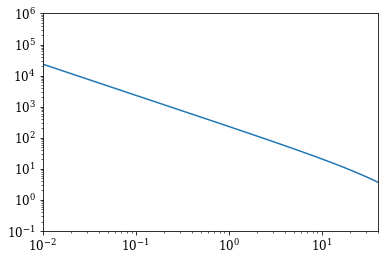

In [7]:
plt.loglog(r, T_t0)
plt.xlim(0.01,40.)
plt.ylim(0.1,1e6)

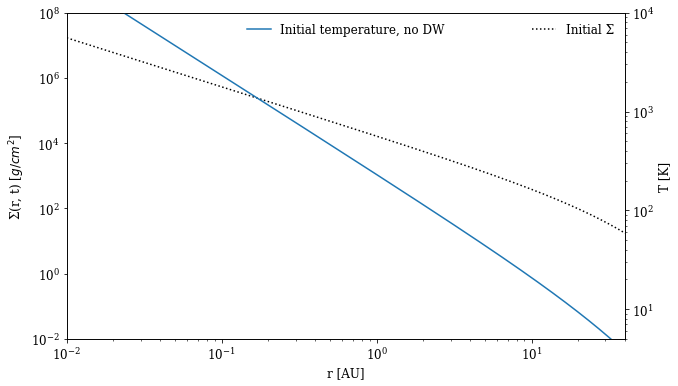

In [13]:
fig, axs = plt.subplots(figsize = (10,6))

axs.loglog(r, Σ_initial(r_au), ls=':', c ='black', label = 'Initial Σ')



axs.set(xlabel = 'r [AU]', ylabel = 'Σ(r, t) [$g/cm^2$]', ylim = (1e-2,1e8), xlim = (0.01, 40));
axs.legend(frameon = False)
axs2 = axs.twinx()

axs2.loglog(r, T_t0, label = 'Initial temperature, no DW')

axs2.set(ylim = (0.5e1, 1e4), ylabel = f'T [{T_t0.unit}]')

axs2.legend(frameon = False, loc = 'upper center')

